# DS160_Final_Project_JRH_BJT

## Poker Hands Data Set

##### Each row contains 10 numerical values and 1 ordinal value. Each row represents a poker hand consisting of 5 cards randomly drawn from a standard deck of 52 cards. Each card is represented by 2 columns: one denoting the rank of the card (Ace, 2, 3... Jack, Queen, King) and the other denoting the suit of the card (Hearts, Spades, Diamonds, Clubs). The order of the cards (columns 1-10) is important in determining a poker hand(column 11).
  
#### The rank of the card will be a numerical value where 1-13 represents Ace, 2, 3... Jack, Queen, King
#### The suit of each card will be a numericl value where 1-4 represents Hearts, Spades, Diamonds, Clubs

#### The final column is the poker hand. It will be a Ordinal value where 0-9 represents:
   ######   0: Nothing in hand; not a recognized poker hand 
   ######   1: One pair; one pair of equal ranks within five cards
   ######   2: Two pairs; two pairs of equal ranks within five cards
   ######   3: Three of a kind; three equal ranks within five cards
   ######   4: Straight; five cards, sequentially ranked with no gaps
   ######   5: Flush; five cards with the same suit
   ######   6: Full house; pair + different rank three of a kind
   ######   7: Four of a kind; four equal ranks within five cards
   ######   8: Straight flush; straight + flush
   ######   9: Royal flush; {Ace, King, Queen, Jack, Ten} + flush

In [221]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB, MultinomialNB, ComplementNB, BernoulliNB
from sklearn import tree
from sklearn.tree import export_text
import graphviz

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [222]:
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC


In [223]:
# reading the data files
poker_train = pd.read_csv('poker-hand-training-true.data', header=None)
poker_test = pd.read_csv('poker-hand-testing.data', header=None)

In [224]:
poker_train.columns

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], dtype='int64')

#### It appears that our data set does not have columns names. Each column represents a suit and rank of a specific card, and the last column represents the type of poker hand. We need to assign proper column names. 

In [225]:
colnames = ['Suit of Card #1', 'Rank of Card #1',
       'Suit of Card #2', 'Rank of Card #2',
       'Suit of Card #3', 'Rank of Card #3', 
       'Suit of Card #4', 'Rank of Card #4',
       'Suit of Card #5', 'Rank of Card #5', 'Poker Hand'
      ]

#### Defining what our columns will be named: this is based off what each number represents in our data. 

In [226]:
poker_test.columns = colnames
poker_train.columns = colnames

#### Assinging the new column names to our datasets

In [227]:
poker_train.head()

,Suit of Card #1,Rank of Card #1,Suit of Card #2,Rank of Card #2,Suit of Card #3,Rank of Card #3,Suit of Card #4,Rank of Card #4,Suit of Card #5,Rank of Card #5,Poker Hand
0,1,10,1,11,1,13,1,12,1,1,9
1,2,11,2,13,2,10,2,12,2,1,9
2,3,12,3,11,3,13,3,10,3,1,9
3,4,10,4,11,4,1,4,13,4,12,9
4,4,1,4,13,4,12,4,11,4,10,9


#### Checking to make sure that our column names were applied correctly. Looks good 

In [228]:
poker_train.shape

(25010, 11)

#### Checking how many rows and columns we have in the training set. The description of the data says we should have 25,010 instances. Looks good

In [229]:
poker_test.shape

(1000000, 11)

#### Again, checking how many rows and columns we have. The description of the data says we should have 1,000,000 instances in this set. Looks good

In [230]:
poker_train['Poker Hand'].value_counts()

0    12493
1    10599
2     1206
3      513
4       93
5       54
6       36
7        6
8        5
9        5
Name: Poker Hand, dtype: int64

#### Checking how many times each specific poker hand occurs in the training set

In [231]:
poker_test['Poker Hand'].value_counts()

0    501209
1    422498
2     47622
3     21121
4      3885
5      1996
6      1424
7       230
8        12
9         3
Name: Poker Hand, dtype: int64

#### Checking how many times each specific poker hand occurs in the test set. Note that there are more royal flushs(9) in the training set than the test set, even though the test set contains 1,000,000 samples compared to the training set having 25,010

##### the description of our data tells us that in the training set, "The Straight flush and Royal flush hands are not as representative of the true domain because they have been over-sampled. The Straight flush is 14.43 times more likely to occur in the training set, while the Royal flush is 129.82 times more likely."

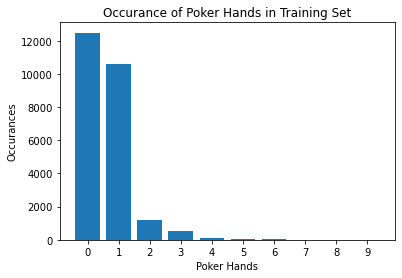

In [232]:
hands = ['0','1','2','3','4','5','6','7','8','9']
instances = [12493, 10599, 1206, 513, 93, 54, 36, 6, 5, 5]

plt.bar(hands,instances)
plt.title('Occurance of Poker Hands in Training Set')
plt.xlabel('Poker Hands')
plt.ylabel('Occurances')
plt.show()

#### a quick bar chart of the training set shows us that the distribution of poker hands is clearly disproportionate with nothing in hand(0) and one pair(1) being the most common by far

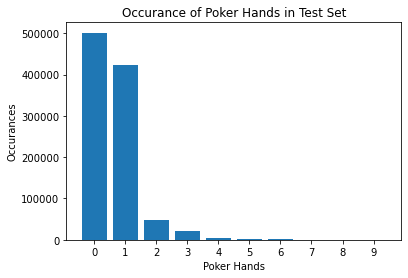

In [233]:
hands = ['0','1','2','3','4','5','6','7','8','9']
instances = [501209, 422498, 47622, 21121, 3885, 1996, 1424, 230, 12, 3]

plt.bar(hands,instances)
plt.title('Occurance of Poker Hands in Test Set')
plt.xlabel('Poker Hands')
plt.ylabel('Occurances')
plt.show()

#### A bar chart of the test data shows us that the distribution of the training set and test set are similar. It appears that neither have a linear distribution.

### Probability of each Poker Hand in each data set

In [234]:
poker_train['Poker Hand'].value_counts() / len(poker_train)

0    0.499520
1    0.423790
2    0.048221
3    0.020512
4    0.003719
5    0.002159
6    0.001439
7    0.000240
8    0.000200
9    0.000200
Name: Poker Hand, dtype: float64

In [235]:
poker_test['Poker Hand'].value_counts() / len(poker_test)

0    0.501209
1    0.422498
2    0.047622
3    0.021121
4    0.003885
5    0.001996
6    0.001424
7    0.000230
8    0.000012
9    0.000003
Name: Poker Hand, dtype: float64

#### Once again, this shows us that the training set has a good representation of the data besides the royal flush(9) and straight flush(8).

In [236]:
y_train = poker_train['Poker Hand']
y_test = poker_test['Poker Hand']

In [237]:
x_train = poker_train.drop('Poker Hand', axis=1)
x_test = poker_test.drop('Poker Hand', axis=1)

In [238]:
clf =MultinomialNB()
clf.fit(x_train, np.ravel(y_train))
y_pred = clf.predict(x_test)

In [239]:
print(classification_report(y_pred,y_test)) 

/Users/bretttully/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bretttully/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       1.00      0.50      0.67    998991
           1       0.00      0.47      0.00      1009
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         0

    accuracy                           0.50   1000000
   macro avg       0.10      0.10      0.07   1000000
weighted avg       1.00      0.50      0.67   1000000



/Users/bretttully/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### One Hot Encoding

In [240]:
XX = poker_train.iloc[:,0:8]
yy = poker_train['Poker Hand']

transformer = OneHotEncoder().fit(XX)
XX = transformer.transform(XX).toarray

In [241]:
XX

<bound method _cs_matrix.toarray of <25010x68 sparse matrix of type '<class 'numpy.float64'>'
	with 200080 stored elements in Compressed Sparse Row format>>

## Logistic Regression

In [242]:
y = poker_train['Poker Hand']

In [243]:
X = poker_train.iloc[:,:-1]

In [244]:
clf = LogisticRegression(random_state=0,max_iter=100000).fit(X,y)
y_predict = clf.predict(x_test)

In [245]:
clf.predict(X)

array([0, 0, 0, ..., 0, 0, 0])

In [246]:
clf.score(X,y)

0.4995201919232307

In [247]:
accuracy_score(y_pred,y_test)

0.501294

#### A logistic regression model on the training data has an accuracy of .501294 when compared to the test set

In [248]:
poker_train['Poker Hand'].sample(100)

15574    0
17853    0
14721    0
10676    0
13229    1
        ..
21892    1
3613     1
22346    0
3913     2
2440     0
Name: Poker Hand, Length: 100, dtype: int64

In [249]:
poker_test

,Suit of Card #1,Rank of Card #1,Suit of Card #2,Rank of Card #2,Suit of Card #3,Rank of Card #3,Suit of Card #4,Rank of Card #4,Suit of Card #5,Rank of Card #5,Poker Hand
0,1,1,1,13,2,4,2,3,1,12,0
1,3,12,3,2,3,11,4,5,2,5,1
2,1,9,4,6,1,4,3,2,3,9,1
3,1,4,3,13,2,13,2,1,3,6,1
4,3,10,2,7,1,2,2,11,4,9,0
...,...,...,...,...,...,...,...,...,...,...,...
999995,3,1,1,12,2,9,4,9,2,6,1
999996,3,3,4,5,2,7,1,4,4,3,1
999997,1,11,4,7,3,9,1,13,2,7,1
999998,3,11,1,8,1,1,3,13,2,8,1


In [250]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
clf = LogisticRegression(random_state=0, solver='lbfgs',max_iter=100,multi_class='ovr').fit(x_train, y_train)
y_pred=clf.predict(x_test)
accuracy_score(y_pred,y_test)

0.501209

In [251]:
trainX = poker_train.iloc[:,0:10] # Features
trainy = poker_train.iloc[:,10:11] # Target variable
testX = poker_test.iloc[:,0:10] # Features
testy = poker_test.iloc[:,10:11] # Target variable


In [252]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf = clf.fit(trainX,trainy)
clf
y_pred = clf.predict(testX)
y_pred

array([0, 0, 1, ..., 1, 1, 0])

In [253]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(testy, y_pred))

Accuracy: 0.480343


In [256]:
from sklearn.ensemble import RandomForestClassifier


# Jack look under here

In [263]:
poker_train.groupby('Poker Hand').size()

Poker Hand
0    12493
1    10599
2     1206
3      513
4       93
5       54
6       36
7        6
8        5
9        5
dtype: int64

In [267]:
poker_train['Poker Hand']=poker_train['Poker Hand'].replace({0:'Nothing in Hand', 
1: 'One pair',
2: 'Two pairs',
3: 'Three of a kind',
4: 'Straight',
5: 'Flush',
6: 'Full house',
7: 'Four of a kind',
8: 'Straight flush',
9: 'Royal flush'})

In [268]:
poker_train["Poker Hand"]

0            Royal flush
1            Royal flush
2            Royal flush
3            Royal flush
4            Royal flush
              ...       
25005    Nothing in Hand
25006           One pair
25007           One pair
25008           One pair
25009           One pair
Name: Poker Hand, Length: 25010, dtype: object

In [ ]:
train_array = poker_test.values

In [ ]:
#Split Values
train_array = poker_train.values
X_train = train_array[:,:-1]
y_train = train_array[:,-1]

In [ ]:
test_array = poker_test.values
X_test = test_array[:,:-1]
y_test = test_array[:,-1]

In [ ]:
model = DecisionTreeClassifier()
model.fit(X_train,y_train)
predictions = model.predict(X_test)
print('Accuracy score ', accuracy_score(y_test,predictions))

In [ ]:
model = RandomForestClassifier(n_estimators = 100)
model.fit(X_train,y_train)
predictions = model.predict(X_test)
print('Accuracy score ',accuracy_score(y_test,predictions))

In [ ]:
logreg = LogisticRegression()
logreg.fit(X_train, y_test)

In [ ]:
y_pred= logreg.predict(X_test)

In [ ]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

In [ ]:
def plot_cm(y_pred, y_test):
    cm = confusion_matrix(y_pred, y_test)
    fig = plt.figure(figsize=(5,5))
    heatmap = sns.heatmap(cm, annot=True, fmt='.2f', cmap='RdYlGn')
    plt.ylabel('True label')
    plt.xlabel('Predicted Label')

In [ ]:
clf = MultinomialNB()
clf.fit(X_train,y_train) 
y_pred = clf.predict(X_test)

In [ ]:
plot_cm(y_pred,y_test)

In [ ]:
poker_test = poker_test.to_numpy()
poker_train = poker_train.to_numpy()
poker_test

In [ ]:
print (class_counts(poker_train))

